# Исследование объявлений о продаже квартир

Определение рыночной стоимости объектов недвижимости (на базе данных ресурса Яндекс.Недвижимость).  
Задача — установить параметры, которые в той или иной степени оказывают влиение на финальную стоимость.  
Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

## План исследования

### 1. Общая информация о данных
    - Посмотрим общую информацию о данных, начало и конец датасета
    - Сделаем предварительные выводы
### 2. Предобработка данных
    - Определим и заполним пропущенные значения
    - Поищем аномалии
    - Изменим типы данных
    - Удалим дубликаты
### 3 .Посчитаем и добавим в таблицу:
    - Цену квадратного метра;
    - День недели, месяц и год публикации объявления;
    - Этаж квартиры; варианты — первый, последний, другой;
    - Соотношение жилой и общей площади, а также отношение площади кухни к общей.

### 4. Проведём исследовательский анализ данных и выполним инструкции:
    - Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.
    - Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?
    - Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.
    - Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года.
    - Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце 'locality_name'.
    - Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге ('locality_name'). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона.
    - Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?
    
### 5. Общий вывод

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

realty = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [3]:
realty.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.00",108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,False,False,25.00,nan,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,nan
1,7,"3,350,000.00",40.40,2018-12-04T00:00:00,1,nan,11.00,18.60,1,NaN,False,False,11.00,2.00,посёлок Шушары,"12,817.00","18,603.00",0.00,nan,0.00,nan,81.00
2,10,"5,196,000.00",56.00,2015-08-20T00:00:00,2,nan,5.00,34.30,4,NaN,False,False,8.30,0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00
3,0,"64,900,000.00",159.00,2015-07-24T00:00:00,3,nan,14.00,nan,9,NaN,False,False,nan,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00
4,2,"10,000,000.00",100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,False,False,41.00,nan,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00


In [4]:
realty.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

В таблице 22 столбца. Имена столбцов корректные.

## Описание данных
•	airports_nearest — расстояние до ближайшего аэропорта в метрах (м)  
•	balcony — число балконов  
•	ceiling_height — высота потолков (м)  
•	cityCenters_nearest — расстояние до центра города (м)  
•	days_exposition — сколько дней было размещено объявление (от публикации до снятия)  
•	first_day_exposition — дата публикации
•	floor — этаж
•	floors_total — всего этажей в доме  
•	is_apartment — апартаменты (булев тип)  
•	kitchen_area — площадь кухни в квадратных метрах (м²)  
•	last_price — цена на момент снятия с публикации  
•	living_area — жилая площадь в квадратных метрах(м²)  
•	locality_name — название населённого пункта  
•	open_plan — свободная планировка (булев тип)  
•	parks_around3000 — число парков в радиусе 3 км  
•	parks_nearest — расстояние до ближайшего парка (м)  
•	ponds_around3000 — число водоёмов в радиусе 3 км  
•	ponds_nearest — расстояние до ближайшего водоёма (м)  
•	rooms — число комнат  
•	studio — квартира-студия (булев тип)  
•	total_area — площадь квартиры в квадратных метрах (м²)  
•	total_images — число фотографий квартиры в объявлении

Посмотрим общую информацию по данным.

In [5]:
realty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [6]:
realty.query('days_exposition.notnull()').count()

total_images            20518
last_price              20518
total_area              20518
first_day_exposition    20518
rooms                   20518
ceiling_height          12051
floors_total            20441
living_area             18813
floor                   20518
is_apartment             2500
studio                  20518
open_plan               20518
kitchen_area            18443
balcony                 11109
locality_name           20470
airports_nearest        15843
cityCenters_nearest     15865
parks_around3000        15865
parks_nearest            6934
ponds_around3000        15865
ponds_nearest            7894
days_exposition         20518
dtype: int64

In [7]:
realty.query('10 > days_exposition > 0').count()

total_images            1130
last_price              1130
total_area              1130
first_day_exposition    1130
rooms                   1130
ceiling_height           688
floors_total            1128
living_area             1059
floor                   1130
is_apartment             124
studio                  1130
open_plan               1130
kitchen_area            1035
balcony                  639
locality_name           1127
airports_nearest         914
cityCenters_nearest      914
parks_around3000         914
parks_nearest            369
ponds_around3000         914
ponds_nearest            407
days_exposition         1130
dtype: int64

In [8]:
realty['days_exposition'].isna().sum()

3181

In [9]:
realty.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,"23,699.00","23,699.00","23,699.00","23,699.00","14,504.00","23,613.00","21,796.00","23,699.00","21,421.00","12,180.00","18,157.00","18,180.00","18,181.00","8,079.00","18,181.00","9,110.00","20,518.00"
mean,9.86,"6,541,548.77",60.35,2.07,2.77,10.67,34.46,5.89,10.57,1.15,"28,793.67","14,191.28",0.61,490.80,0.77,517.98,180.89
std,5.68,"10,887,013.27",35.65,1.08,1.26,6.60,22.03,4.89,5.91,1.07,"12,630.88","8,608.39",0.80,342.32,0.94,277.72,219.73
min,0.00,"12,190.00",12.00,0.00,1.00,1.00,2.00,1.00,1.30,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00
25%,6.00,"3,400,000.00",40.00,1.00,2.52,5.00,18.60,2.00,7.00,0.00,"18,585.00","9,238.00",0.00,288.00,0.00,294.00,45.00
50%,9.00,"4,650,000.00",52.00,2.00,2.65,9.00,30.00,4.00,9.10,1.00,"26,726.00","13,098.50",0.00,455.00,1.00,502.00,95.00
75%,14.00,"6,800,000.00",69.90,3.00,2.80,16.00,42.30,8.00,12.00,2.00,"37,273.00","16,293.00",1.00,612.00,1.00,729.00,232.00
max,50.00,"763,000,000.00",900.00,19.00,100.00,60.00,409.70,33.00,112.00,5.00,"84,869.00","65,968.00",3.00,"3,190.00",3.00,"1,344.00","1,580.00"


In [10]:
realty.tail()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23694,9,"9,700,000.00",133.81,2017-03-21T00:00:00,3,3.70,5.00,73.30,3,NaN,False,False,13.83,nan,Санкт-Петербург,"24,665.00","4,232.00",1.00,796.00,3.00,381.00,nan
23695,14,"3,100,000.00",59.00,2018-01-15T00:00:00,3,nan,5.00,38.00,4,NaN,False,False,8.50,nan,Тосно,nan,nan,nan,nan,nan,nan,45.00
23696,18,"2,500,000.00",56.70,2018-02-11T00:00:00,2,nan,3.00,29.70,1,NaN,False,False,nan,nan,село Рождествено,nan,nan,nan,nan,nan,nan,nan
23697,13,"11,475,000.00",76.75,2017-03-28T00:00:00,2,3.00,17.00,nan,12,NaN,False,False,23.30,2.00,Санкт-Петербург,"39,140.00","10,364.00",2.00,173.00,3.00,196.00,602.00
23698,4,"1,350,000.00",32.30,2017-07-21T00:00:00,1,2.50,5.00,12.30,1,NaN,False,False,9.00,nan,поселок Новый Учхоз,nan,nan,nan,nan,nan,nan,nan


In [11]:
realty.sample()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3620,11,"3,770,000.00",42.00,2017-09-11T00:00:00,3,nan,5.00,30.00,2,NaN,False,False,5.50,0.00,Санкт-Петербург,"12,506.00","12,444.00",1.00,170.00,1.00,821.00,21.00


### Вывод

- Присутствует большое колличество пропущенных значений в разных столбцах.
- Целесообразно изменить тип данных в отдельных столбцах.
  Особенно отметим first_day_exposition, который нужно перевести в формат даты %Y-%m-%d, отбросив время, так как оно не требуется для исследования и судя по выборке везде не указано.
- По различию среднего и медианы в отдельных столбцах можно предварительно сделать вывод об аномальных значениях.  
  
  На этапе предобработки данных рассмотрим отдельно каждый столбец датасета.

### Шаг 2. Предобработка данных

**Изучим и заполним пропуски там где это необходимо**

In [12]:
# Определим в каких столбцах пропущенны значения
realty.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

#####  В рамках исследования нам не требуются столбцы: is_apartment, balcony, airports_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest. После обработки дубликатов, удалим их из датасета.

**1) ceiling_height - Высота потолков**

In [13]:
# Высота потолков
realty['ceiling_height'].describe()

count   14,504.00
mean         2.77
std          1.26
min          1.00
25%          2.52
50%          2.65
75%          2.80
max        100.00
Name: ceiling_height, dtype: float64

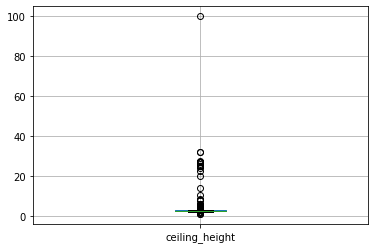

In [14]:
realty.boxplot('ceiling_height')
plt.show()

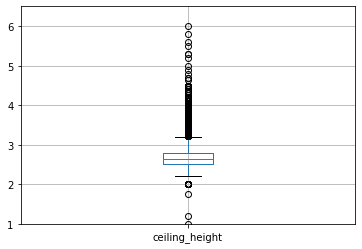

In [15]:
plt.ylim(1, 6.5)
realty.boxplot('ceiling_height')
plt.show()

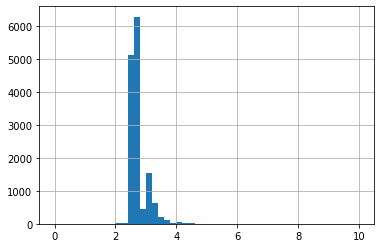

In [16]:
realty['ceiling_height'].hist(bins = 50,range = (0, 10))
plt.show()

Большая часть значений в промежутке от 2.5 до 2.8 метров, что похоже на правду.  
Обычно высота потолков колеблется от 2.4 до 3.5 метров. В элитном жилье и загородных домах может быть 5-6 метров.   
Мы не берём редкие значения, таким образом считаем, что корректные значения в пределах от 2.4 до 4м.  
В данных есть аномалии.

In [17]:
# Сохраним фильтр для дальнейшего исследования
ceiling_height_filt = '2.4<=ceiling_height<=4'

In [18]:
# Посмотрим на аномальные значения и их колличество
realty.query('ceiling_height >= 4 or ceiling_height <=2.4').head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
154,1,"8,200,000.00",80.00,2018-11-06T00:00:00,3,4.15,3.00,44.20,2,NaN,False,False,12.20,nan,Санкт-Петербург,"20,562.00","3,167.00",2.00,344.00,1.00,838.00,38.00
179,5,"14,800,000.00",108.70,2019-04-11T00:00:00,3,4.00,5.00,72.40,5,NaN,False,False,8.00,nan,Санкт-Петербург,"23,017.00","2,559.00",1.00,559.00,0.00,nan,nan
227,13,"2,200,000.00",47.00,2018-01-12T00:00:00,3,2.34,5.00,nan,1,NaN,False,False,nan,nan,посёлок Новый Свет,nan,nan,nan,nan,nan,nan,45.00
355,17,"3,600,000.00",55.20,2018-07-12T00:00:00,2,25.00,5.00,32.00,2,False,False,False,nan,2.00,Гатчина,nan,nan,nan,nan,nan,nan,259.00
464,15,"66,571,000.00",280.30,2015-06-11T00:00:00,6,5.20,8.00,159.50,7,NaN,False,False,21.10,0.00,Санкт-Петербург,"26,316.00","6,655.00",3.00,187.00,1.00,616.00,578.00
552,11,"2,999,000.00",33.50,2017-03-30T00:00:00,1,2.00,15.00,17.50,6,NaN,False,False,6.50,nan,Санкт-Петербург,"33,972.00","11,746.00",1.00,520.00,1.00,949.00,270.00
1026,20,"155,000,000.00",310.00,2018-10-12T00:00:00,5,5.30,3.00,190.00,3,NaN,False,False,63.00,2.00,Санкт-Петербург,"24,899.00","4,785.00",0.00,nan,1.00,603.00,nan
1053,13,"550,000.00",29.00,2018-02-01T00:00:00,1,5.00,3.00,nan,1,False,False,False,nan,nan,Бокситогорск,nan,nan,nan,nan,nan,nan,6.00
1085,16,"75,000,000.00",323.00,2017-07-10T00:00:00,5,4.00,5.00,255.70,4,NaN,False,False,66.00,nan,Санкт-Петербург,"23,713.00",594.00,3.00,398.00,2.00,515.00,259.00
1129,20,"6,695,000.00",36.90,2018-09-28T00:00:00,1,4.06,5.00,22.00,2,NaN,False,False,7.20,nan,Санкт-Петербург,"21,725.00","2,990.00",1.00,596.00,1.00,866.00,110.00


In [19]:
realty.query('ceiling_height >=4 or ceiling_height <=2.4')['ceiling_height'].count()

158

Всего 158 строк. Можно отметить, что скорее всего в отдельных значениях некорректно стоит запятая.

In [20]:
# Проверим в каких городах больше всего пропусков
realty.query('ceiling_height.isnull()')['locality_name'].value_counts()

Санкт-Петербург                   5617
посёлок Мурино                     322
посёлок Шушары                     223
посёлок Парголово                  190
деревня Кудрово                    177
                                  ... 
посёлок Мыза-Ивановка                1
деревня Куровицы                     1
поселок городского типа Рябово       1
деревня Бор                          1
деревня Кузьмолово                   1
Name: locality_name, Length: 283, dtype: int64

In [21]:
# Посмотрим сколько, в СПБ и остальных городах
print("Пропущенных значений не в СПБ",realty.query('ceiling_height.isnull() and locality_name not in "Санкт-Петербург"')['locality_name'].count())
print("Пропущенных значений в СПБ",realty.query('ceiling_height.isnull() and locality_name in "Санкт-Петербург"')['locality_name'].count())

Пропущенных значений не в СПБ 3543
Пропущенных значений в СПБ 5617


In [22]:
# Посчитаем медиану для этих групп
realty.query(f'{ceiling_height_filt} and locality_name in "Санкт-Петербург"')['ceiling_height'].median()

2.7

In [23]:
realty.query(f'{ceiling_height_filt} and locality_name not in "Санкт-Петербург"')['ceiling_height'].median()

2.6

Оптимальный вариант заменить пропуски исходя из полученных значений.

In [24]:
# Пишем соответствующую функцию
def vis_pot(row):
    if row['locality_name'] == 'Санкт-Петербург':
        return 2.7
    return 2.6

In [25]:
# Вызываем её и удаляем пропуски
realty.loc[realty['ceiling_height'].isnull(),'ceiling_height'] = realty.apply(vis_pot, axis=1)

In [26]:
# Проверим
print("Пропущенных значений не в СПБ",realty.query('ceiling_height.isnull() and locality_name not in "Санкт-Петербург"')['locality_name'].count())
print("Пропущенных значений в СПБ",realty.query('ceiling_height.isnull() and locality_name in "Санкт-Петербург"')['locality_name'].count())

Пропущенных значений не в СПБ 0
Пропущенных значений в СПБ 0


In [27]:
realty['ceiling_height'].isnull().sum()

0

In [28]:
# В данной строке был пропуск. Сейчас корректно заменено на 2.7
realty.loc[2]

total_images                             10
last_price                     5,196,000.00
total_area                            56.00
first_day_exposition    2015-08-20T00:00:00
rooms                                     2
ceiling_height                         2.70
floors_total                           5.00
living_area                           34.30
floor                                     4
is_apartment                            NaN
studio                                False
open_plan                             False
kitchen_area                           8.30
balcony                                0.00
locality_name               Санкт-Петербург
airports_nearest                  21,741.00
cityCenters_nearest               13,933.00
parks_around3000                       1.00
parks_nearest                         90.00
ponds_around3000                       2.00
ponds_nearest                        574.00
days_exposition                      558.00
Name: 2, dtype: object

Всё корректно, переходим к следующему столбцу.

**2) floors_total - всего этажей в доме. Пропусков немного - 86. Этот столбец понадобится при определении последнего этажа**

In [29]:
# Посмотрим на пропущенные значения
realty.query('floors_total.isnull()')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,"11,640,000.00",65.20,2018-10-02T00:00:00,2,2.70,nan,30.80,4,NaN,False,False,12.00,nan,Санкт-Петербург,"39,197.00","12,373.00",1.00,123.00,0.00,nan,49.00
237,4,"2,438,033.00",28.10,2016-11-23T00:00:00,1,2.70,nan,20.75,1,NaN,False,False,nan,0.00,Санкт-Петербург,"22,041.00","17,369.00",0.00,nan,1.00,374.00,251.00
457,4,"9,788,348.00",70.80,2015-08-01T00:00:00,2,2.70,nan,38.40,12,NaN,False,False,10.63,0.00,Санкт-Петербург,"37,364.00","8,322.00",2.00,309.00,2.00,706.00,727.00
671,4,"6,051,191.00",93.60,2017-04-06T00:00:00,3,2.70,nan,47.10,8,NaN,False,False,16.80,0.00,Санкт-Петербург,"22,041.00","17,369.00",0.00,nan,1.00,374.00,123.00
1757,5,"3,600,000.00",39.00,2017-04-22T00:00:00,1,2.70,nan,nan,9,NaN,False,False,nan,0.00,Санкт-Петербург,"22,735.00","11,618.00",1.00,835.00,1.00,652.00,77.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,5,"8,500,000.00",63.50,2017-05-24T00:00:00,2,2.80,nan,nan,3,NaN,False,False,nan,nan,Санкт-Петербург,"51,340.00","15,363.00",0.00,nan,1.00,853.00,512.00
22656,4,"4,574,160.00",64.50,2017-04-02T00:00:00,2,2.70,nan,31.70,20,NaN,False,False,14.40,0.00,Санкт-Петербург,"22,041.00","17,369.00",0.00,nan,1.00,374.00,127.00
22808,0,"14,569,263.00",110.40,2016-11-20T00:00:00,3,2.70,nan,45.38,6,NaN,False,False,23.42,0.00,Санкт-Петербург,"19,095.00","4,529.00",0.00,nan,0.00,nan,260.00
23590,0,"21,187,872.00",123.30,2017-04-25T00:00:00,3,2.70,nan,50.40,18,NaN,False,False,23.60,0.00,Санкт-Петербург,"19,095.00","4,529.00",0.00,nan,0.00,nan,104.00


In [30]:
realty.query('floors_total.isnull()')['locality_name'].value_counts()

Санкт-Петербург                    70
Кудрово                             2
Красное Село                        2
посёлок Мурино                      2
поселок Мурино                      2
городской посёлок Новоселье         1
поселок городского типа Токсово     1
деревня Новое Девяткино             1
посёлок Шушары                      1
посёлок Стрельна                    1
посёлок Бугры                       1
посёлок Щеглово                     1
Name: locality_name, dtype: int64

Большинство пропусков в СПБ. Характерные признаки у пропусков нет.

In [31]:
# Проверим на аномалии
realty['floors_total'].describe()

count   23,613.00
mean        10.67
std          6.60
min          1.00
25%          5.00
50%          9.00
75%         16.00
max         60.00
Name: floors_total, dtype: float64

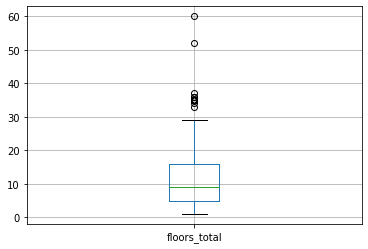

In [32]:
realty.boxplot('floors_total')
plt.show()

In [33]:
realty.query('floors_total >= 30').sort_values(by = 'floors_total', ascending = False).head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
2253,12,"3,800,000.00",45.50,2018-06-28T00:00:00,2,2.88,60.00,27.40,4,NaN,False,False,7.40,nan,Кронштадт,"67,763.00","49,488.00",2.00,342.00,3.00,614.00,166.00
16731,9,"3,978,000.00",40.00,2018-09-24T00:00:00,1,2.65,52.00,10.50,18,NaN,False,False,14.00,nan,Санкт-Петербург,"20,728.00","12,978.00",1.00,793.00,0.00,nan,45.00
16934,5,"4,100,000.00",40.00,2017-10-17T00:00:00,1,1.75,37.00,17.40,5,NaN,False,False,8.34,nan,Санкт-Петербург,"18,732.00","20,444.00",0.00,nan,3.00,80.00,71.00
397,15,"5,990,000.00",54.00,2018-03-22T00:00:00,2,2.70,36.00,21.40,28,NaN,False,False,18.70,1.00,Санкт-Петербург,"18,732.00","20,444.00",0.00,nan,3.00,80.00,11.00
5807,17,"8,150,000.00",80.00,2019-01-09T00:00:00,2,27.00,36.00,41.00,13,NaN,False,False,12.00,5.00,Санкт-Петербург,"18,732.00","20,444.00",0.00,nan,3.00,80.00,38.00
11079,16,"9,200,000.00",75.00,2019-02-22T00:00:00,2,2.70,36.00,40.00,29,NaN,False,False,12.00,2.00,Санкт-Петербург,"18,732.00","20,444.00",0.00,nan,3.00,80.00,nan
2966,9,"4,300,000.00",37.00,2017-08-08T00:00:00,1,2.70,35.00,14.00,15,NaN,False,False,10.40,0.00,Санкт-Петербург,"18,732.00","20,444.00",0.00,nan,3.00,80.00,50.00
4855,12,"5,500,000.00",50.00,2017-06-22T00:00:00,1,2.80,35.00,22.00,4,NaN,False,False,13.00,nan,Санкт-Петербург,"18,627.00","20,339.00",1.00,609.00,3.00,145.00,537.00
21809,20,"10,600,000.00",77.00,2019-04-16T00:00:00,2,2.70,35.00,39.00,11,NaN,False,False,14.00,2.00,Санкт-Петербург,"18,732.00","20,444.00",0.00,nan,3.00,80.00,nan
21599,12,"6,200,000.00",51.00,2017-08-27T00:00:00,2,2.70,35.00,27.00,13,NaN,False,False,19.00,nan,Санкт-Петербург,"18,732.00","20,444.00",0.00,nan,3.00,80.00,nan


Высотки/Небоскрёбы в 35 этажей реальны. 2 выброса свыше учитывать не будем.
Также стоит отметить наличие одноэтажных домов. Скорее всего это не квартиры, а загородные дома.  
Однако в датасете есть СНТ, посёлки и деревни в которых также врятли могут быть многоквартирные дома.  
Описание проекта неоднозначно, будем считать, что проводится анализ квартир в СПБ и квартир/домов в других городах.

In [34]:
floors_total_filt = 'floors_total <= 35'

In [35]:
realty.query('floors_total <= 35 and locality_name in "Санкт-Петербург"')['floors_total'].median()

9.0

In [36]:
# Медина в СПБ соответсвует общий. Заменим пропуски на медиану
realty['floors_total'] = realty['floors_total'].fillna(realty['floors_total'].median())

In [37]:
# Проверим замену
realty.query('floors_total.isnull()')['floors_total'].count()

0

In [38]:
realty.loc[186]

total_images                             12
last_price                    11,640,000.00
total_area                            65.20
first_day_exposition    2018-10-02T00:00:00
rooms                                     2
ceiling_height                         2.70
floors_total                           9.00
living_area                           30.80
floor                                     4
is_apartment                            NaN
studio                                False
open_plan                             False
kitchen_area                          12.00
balcony                                 NaN
locality_name               Санкт-Петербург
airports_nearest                  39,197.00
cityCenters_nearest               12,373.00
parks_around3000                       1.00
parks_nearest                        123.00
ponds_around3000                       0.00
ponds_nearest                           NaN
days_exposition                       49.00
Name: 186, dtype: object

**3) living_area - данный столбец потребуется для добавления метрик. Пропусков почти 10%**

In [39]:
# Посмотри на данные
realty['living_area'].describe()

count   21,796.00
mean        34.46
std         22.03
min          2.00
25%         18.60
50%         30.00
75%         42.30
max        409.70
Name: living_area, dtype: float64

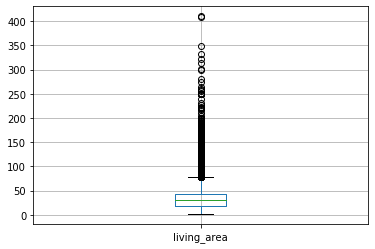

In [40]:
realty.boxplot('living_area')
plt.show()

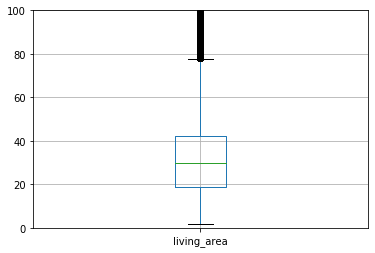

In [41]:
plt.ylim(0, 100)
realty.boxplot('living_area')
plt.show()

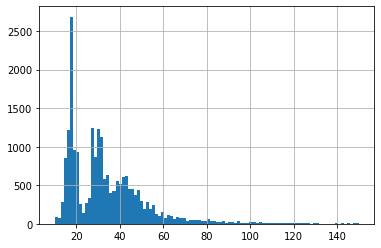

In [42]:
realty['living_area'].hist(bins = 100,range = (10, 150))
plt.show()

Пики в районе 15,30,40м. Логично для 1-3 комнатных квартир, всё что выше элитное жильё или аномалии.

In [43]:
# Посмотрим на метраж больше 100м
realty.query('living_area >= 100').sort_values(by = 'living_area', ascending = False).head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
19540,8,"420,000,000.00",900.00,2017-12-06T00:00:00,12,2.80,25.00,409.70,25,NaN,False,False,112.00,nan,Санкт-Петербург,"30,706.00","7,877.00",0.00,nan,2.00,318.00,106.00
5358,20,"65,000,000.00",590.00,2019-02-14T00:00:00,15,3.50,6.00,409.00,3,NaN,False,False,100.00,nan,Санкт-Петербург,"24,447.00","4,666.00",1.00,767.00,0.00,nan,14.00
12401,20,"91,500,000.00",495.00,2017-06-19T00:00:00,7,4.65,7.00,347.50,7,NaN,False,False,25.00,0.00,Санкт-Петербург,nan,"5,735.00",2.00,110.00,0.00,nan,14.00
4237,1,"50,000,000.00",517.00,2017-10-14T00:00:00,7,2.70,4.00,332.00,3,NaN,False,False,22.00,nan,Санкт-Петербург,"22,835.00","1,847.00",2.00,477.00,2.00,540.00,nan
12859,20,"140,000,000.00",631.20,2019-04-09T00:00:00,7,3.90,4.00,322.30,4,NaN,False,False,19.50,1.00,Санкт-Петербург,"25,707.00","4,972.00",0.00,nan,2.00,210.00,nan
660,3,"49,950,000.00",483.90,2017-10-04T00:00:00,7,3.20,6.00,312.50,4,NaN,False,False,26.40,nan,Санкт-Петербург,"23,079.00",945.00,3.00,461.00,3.00,22.00,391.00
8018,20,"84,000,000.00",507.00,2015-12-17T00:00:00,5,4.45,7.00,301.50,7,True,False,False,45.50,1.00,Санкт-Петербург,nan,"5,735.00",2.00,110.00,0.00,nan,"1,078.00"
14088,8,"51,000,000.00",402.00,2017-02-07T00:00:00,6,3.15,8.00,300.00,6,NaN,False,False,56.00,2.00,Санкт-Петербург,"24,484.00","5,052.00",1.00,253.00,0.00,nan,32.00
20273,12,"20,000,000.00",460.80,2019-03-20T00:00:00,6,3.10,3.00,279.60,1,NaN,False,False,55.50,nan,Санкт-Петербург,"43,756.00","15,459.00",1.00,852.00,3.00,122.00,21.00
22494,7,"91,075,000.00",491.00,2017-05-27T00:00:00,5,4.20,9.00,274.00,9,NaN,False,False,45.00,0.00,Санкт-Петербург,"25,525.00","5,845.00",2.00,116.00,0.00,nan,115.00


Это элитное жильё

In [44]:
realty.query('living_area <= 10').sort_values(by = 'living_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
21758,0,"2,330,000.00",23.00,2018-01-01T00:00:00,0,2.60,24.00,2.00,22,NaN,True,False,nan,nan,посёлок Мурино,nan,nan,nan,nan,nan,nan,66.00
13915,20,"6,350,000.00",52.00,2018-02-06T00:00:00,2,3.00,6.00,2.00,2,NaN,False,False,9.00,nan,Санкт-Петербург,"32,453.00","6,521.00",0.00,nan,1.00,"1,012.00",91.00
23574,14,"64,990,000.00",139.00,2015-11-24T00:00:00,3,3.00,8.00,3.00,8,NaN,False,False,16.00,1.00,Санкт-Петербург,"33,255.00","5,975.00",1.00,630.00,3.00,100.00,280.00
3242,7,"4,440,000.00",41.00,2017-07-02T00:00:00,1,2.70,17.00,3.00,17,NaN,False,False,11.00,nan,Санкт-Петербург,"19,272.00","13,073.00",0.00,nan,0.00,nan,216.00
17582,11,"2,680,000.00",22.00,2018-08-11T00:00:00,0,2.70,25.00,5.00,8,NaN,True,False,nan,2.00,Санкт-Петербург,"22,735.00","11,618.00",1.00,835.00,1.00,652.00,70.00
21943,15,"6,100,000.00",77.60,2019-02-28T00:00:00,4,2.50,9.00,5.40,1,NaN,False,False,9.80,nan,Санкт-Петербург,"29,338.00","11,270.00",1.00,584.00,0.00,nan,33.00
16431,13,"3,799,000.00",31.00,2018-04-12T00:00:00,1,2.60,5.00,6.00,1,NaN,False,False,17.00,nan,Санкт-Петербург,"32,177.00","4,826.00",1.00,430.00,0.00,nan,168.00
19251,19,"4,050,000.00",33.00,2018-10-15T00:00:00,1,2.50,22.00,6.50,21,NaN,False,False,18.00,nan,Санкт-Петербург,"9,258.00","10,592.00",1.00,458.00,0.00,nan,44.00
23208,12,"4,800,000.00",37.00,2016-02-24T00:00:00,1,2.70,14.00,8.00,11,NaN,False,False,22.00,0.00,Санкт-Петербург,"27,838.00","12,387.00",2.00,358.00,1.00,950.00,139.00
20994,7,"8,900,000.00",50.60,2018-10-22T00:00:00,2,2.50,7.00,8.00,3,NaN,False,False,31.00,nan,Санкт-Петербург,"12,771.00","8,301.00",1.00,173.00,3.00,126.00,nan


Похоже на некорректные значения, но их мало.

В рамках исследования нас просят убрать редкие и выбивающиеся значения.  
Элитное жильё целесообразно исследовать отдельно.  
Таким образом нас интересует только массовый сегмент, поэтому отсекаем значения **ниже 10 и свыше 80 метров**.

In [45]:
# Как видно таких значений немного
realty.query('living_area <= 10 or living_area >= 80')['living_area'].count()

776

In [46]:
# Проверим повлияют ли они на показатель медианы
print(realty.query('living_area >= 10 and living_area <= 80')['living_area'].median())
print(realty['living_area'].median())

30.0
30.0


In [47]:
# Не влияет
# Можно заполнить пропуски медианой, но стоит проверить нет ли отличий по общей площади в пропущенных значениях
realty.query('living_area.isnull()')['total_area'].describe()

count   1,903.00
mean       63.32
std        45.07
min        13.00
25%        41.00
50%        53.00
75%        71.00
max       631.00
Name: total_area, dtype: float64

In [48]:
realty['total_area'].describe()

count   23,699.00
mean        60.35
std         35.65
min         12.00
25%         40.00
50%         52.00
75%         69.90
max        900.00
Name: total_area, dtype: float64

Значения почти идентичные - заполняем медианой.

In [49]:
realty['living_area'] = realty['living_area'].fillna(realty['living_area'].median())

In [50]:
# Проверим замену
realty.query('living_area.isnull()')['living_area'].count()

0

In [51]:
# Сохраним фильтр для данного столбца
living_area_filt = 'living_area >= 10 and living_area <= 80'

**4) kitchen_area**  
Заполняем по аналогии с жилой площадью на медиану.

In [52]:
realty['kitchen_area'].describe()

count   21,421.00
mean        10.57
std          5.91
min          1.30
25%          7.00
50%          9.10
75%         12.00
max        112.00
Name: kitchen_area, dtype: float64

In [53]:
realty['kitchen_area'] = realty['kitchen_area'].fillna(realty['kitchen_area'].median())

In [54]:
# Проверим замену
realty.query('kitchen_area.isnull()')['kitchen_area'].count()

0

**5) locality_name**  
В данном столбец 49 пропусков. Скорей всего они носят технический характер, так как продать квартиру в вакууме врятли получится.  
Теоретически можно заполнить пропуски исходя из геоданных, но так как их мало считаю можно удалить.  
Целесообразно проверить столбец на корректность имён и неявных дубликатов названий населенных пунктов.

In [55]:
realty['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Явно бросается в глаза наличие буквы "ё". Могут быть дубликаты.

In [56]:
# Посмотрим сколько изначально уникальных имён
len(realty['locality_name'].unique())

365

In [57]:
# Заменим Ё на Е
realty['locality_name'] = realty['locality_name'].str.replace('ё', 'е', regex=True)

In [58]:
len(realty['locality_name'].unique())

331

Убрали 34 дубля

In [59]:
# Удалим пропуски. 
realty = realty.dropna(subset=['locality_name'])

In [60]:
realty['locality_name'].isna().sum()

0

**6) cityCenters_nearest**  
Можно попробовать заполнить пропуски в зависимости от населённого пункта.

In [61]:
realty['cityCenters_nearest'].isna().sum()

5511

In [62]:
realty['cityCenters_nearest'].describe()

count   18,139.00
mean    14,197.86
std      8,606.83
min        181.00
25%      9,241.00
50%     13,105.00
75%     16,293.00
max     65,968.00
Name: cityCenters_nearest, dtype: float64

In [63]:
# Посмотрим в каких городах пропуски
realty.query('cityCenters_nearest.isnull()')['locality_name'].value_counts()

поселок Мурино             554
Всеволожск                 398
Гатчина                    307
деревня Кудрово            299
Выборг                     237
                          ... 
поселок Кирпичное            1
поселок станции Лужайка      1
поселок Почап                1
деревня Хязельки             1
деревня Борисова Грива       1
Name: locality_name, Length: 312, dtype: int64

In [64]:
# И где вообще заполнены эти расстояния
f_loc_nam = realty.groupby('locality_name')['cityCenters_nearest'].median().sort_values()
f_loc_nam

locality_name
Санкт-Петербург        12,244.50
поселок Парголово      19,311.00
поселок Мурино         21,888.00
поселок Стрельна       23,506.00
поселок Шушары         24,212.00
                          ...   
село Путилово                nan
село Рождествено             nan
село Русско-Высоцкое         nan
село Старая Ладога           nan
село Шум                     nan
Name: cityCenters_nearest, Length: 330, dtype: float64

In [64]:
print("Всего населённых пунктов:",len(realty['locality_name'].unique()))
print("Есть информация по расстоянию до центра:",len(realty.query('cityCenters_nearest.notnull()')['locality_name'].value_counts()))
print("Нет информации по расстоянию до центра:",len(realty.query('cityCenters_nearest.isnull()')['locality_name'].value_counts()))

Всего населённых пунктов: 330
Есть информация по расстоянию до центра: 27
Нет информации по расстоянию до центра: 312


Во многих населённых пунктах эти значения вообще не заполнены, хотя есть информация о названии.  
Стоит задать вопрос администратору БД о причинах.  
Часть значений заполним медианой в зависимости от населённого пункта, остальные останутся пустыми.

Дополнительно отметим, что судя по значением эти расстояния до центра города СПБ.

In [65]:
def fill_locality_name(row):
    return f_loc_nam.loc[row['locality_name']]

In [66]:
realty.loc[realty['cityCenters_nearest'].isnull(),'cityCenters_nearest'] = realty.apply(fill_locality_name, axis=1)

In [67]:
realty['cityCenters_nearest'].isna().sum()

4864

647 пропусков заполнены, но большинство осталось.  
Заполним их "маркером": -1

In [68]:
realty['cityCenters_nearest'] = realty['cityCenters_nearest'].fillna(-1)

In [69]:
# Проверим
realty['cityCenters_nearest'].isna().sum()

0

In [70]:
# Сохраним фильтр
cityCenters_nearest_mark = 'cityCenters_nearest != -1'

**7) days_exposition**

In [71]:
realty['days_exposition'].isnull().sum()

3180

У нас нет информации о дате снятия объявления.  
Также заполним их "маркером": -1

In [72]:
realty['days_exposition'] = realty['days_exposition'].fillna(-1)

In [73]:
realty['days_exposition'].isnull().sum()

0

In [74]:
# Сохраним фильтр
days_exposition_mark = 'days_exposition != -1'

**Посмотрим на промежуточный результат перед корректировкой типов данных.**

In [75]:
realty.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23650 non-null int64
last_price              23650 non-null float64
total_area              23650 non-null float64
first_day_exposition    23650 non-null object
rooms                   23650 non-null int64
ceiling_height          23650 non-null float64
floors_total            23650 non-null float64
living_area             23650 non-null float64
floor                   23650 non-null int64
is_apartment            2760 non-null object
studio                  23650 non-null bool
open_plan               23650 non-null bool
kitchen_area            23650 non-null float64
balcony                 12137 non-null float64
locality_name           23650 non-null object
airports_nearest        18116 non-null float64
cityCenters_nearest     23650 non-null float64
parks_around3000        18140 non-null float64
parks_nearest           8064 non-null float64
ponds_around300

In [76]:
realty.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment            20890
studio                      0
open_plan                   0
kitchen_area                0
balcony                 11513
locality_name               0
airports_nearest         5534
cityCenters_nearest         0
parks_around3000         5510
parks_nearest           15586
ponds_around3000         5510
ponds_nearest           14565
days_exposition             0
dtype: int64

#####  Пропуски обработаны, далее изменим типы данных там где это целесообразно

In [77]:
# first_day_exposition приведем к к формату %Y-%m-%d
realty['first_day_exposition'] = pd.to_datetime(realty['first_day_exposition'], format='%Y-%m-%d')

In [78]:
realty.head(1)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.00",108.00,2019-03-07,3,2.70,16.00,51.00,8,NaN,False,False,25.00,nan,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,-1.00


In [79]:
# В ряде строк можно изменить типо с float на int. Например, колличество этажей явно целочисленное число.
for column in ['floors_total','days_exposition']:
    realty[column] = realty[column].astype('int')

**Обработаем дубликаты**

In [80]:
# Дубликатов нет.
realty.duplicated().sum()

0

In [81]:
# Удаляем лишние столбцы is_apartment, balcony, airports_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest
# open_plan,total_images  
realty_filt = realty.drop(['is_apartment', 'balcony', 'airports_nearest','parks_around3000','parks_nearest','ponds_around3000','ponds_nearest','open_plan','total_images'], axis=1)

In [82]:
# Посмотрим на результат предобработки данных
realty_filt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 13 columns):
last_price              23650 non-null float64
total_area              23650 non-null float64
first_day_exposition    23650 non-null datetime64[ns]
rooms                   23650 non-null int64
ceiling_height          23650 non-null float64
floors_total            23650 non-null int64
living_area             23650 non-null float64
floor                   23650 non-null int64
studio                  23650 non-null bool
kitchen_area            23650 non-null float64
locality_name           23650 non-null object
cityCenters_nearest     23650 non-null float64
days_exposition         23650 non-null int64
dtypes: bool(1), datetime64[ns](1), float64(6), int64(4), object(1)
memory usage: 3.0+ MB


#####  Предобработка данных выполнена
В интересующих нас столбцах заполнены пропуски и изменены типы данных.

### Шаг 3. Посчитайте и добавьте в таблицу

In [83]:
# Добавляем цену квадратного метра
realty_filt['price_square_meter'] = realty_filt['last_price'] / realty_filt['total_area']

In [84]:
# День недели, месяц и год публикации объявления
realty_filt['day_exposition'] = realty_filt['first_day_exposition'].dt.weekday
realty_filt['month_exposition'] = realty_filt['first_day_exposition'].dt.month
realty_filt['year_exposition'] = realty_filt['first_day_exposition'].dt.year

In [85]:
# Этаж квартиры
def categorize_floor(row):
    if row['floor'] == 1:
        return 'Первый'
    elif row['floor'] == row['floors_total']:
        return 'Последний'
    else:
        return 'Другой'
    
realty_filt['floor_cat'] = realty_filt.apply(categorize_floor, axis=1)

In [86]:
# Проверим
realty_filt['floor_cat'].value_counts()

Другой       17403
Последний     3335
Первый        2912
Name: floor_cat, dtype: int64

In [87]:
# Cоотношение жилой и общей площади
realty_filt['living_total_area_ratio'] = realty_filt['living_area'] / realty_filt['total_area']

In [88]:
# Отношение площади кухни к общей
realty_filt['kitchen_total_area_ratio'] = realty_filt['kitchen_area'] / realty_filt['total_area']

In [89]:
# Посмотрим на результат
realty_filt.head()

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,kitchen_area,locality_name,cityCenters_nearest,days_exposition,price_square_meter,day_exposition,month_exposition,year_exposition,floor_cat,living_total_area_ratio,kitchen_total_area_ratio
0,"13,000,000.00",108.00,2019-03-07,3,2.70,16,51.00,8,False,25.00,Санкт-Петербург,"16,028.00",-1,"120,370.37",3,3,2019,Другой,0.47,0.23
1,"3,350,000.00",40.40,2018-12-04,1,2.60,11,18.60,1,False,11.00,поселок Шушары,"18,603.00",81,"82,920.79",1,12,2018,Первый,0.46,0.27
2,"5,196,000.00",56.00,2015-08-20,2,2.70,5,34.30,4,False,8.30,Санкт-Петербург,"13,933.00",558,"92,785.71",3,8,2015,Другой,0.61,0.15
3,"64,900,000.00",159.00,2015-07-24,3,2.70,14,30.00,9,False,9.10,Санкт-Петербург,"6,800.00",424,"408,176.10",4,7,2015,Другой,0.19,0.06
4,"10,000,000.00",100.00,2018-06-19,2,3.03,14,32.00,13,False,41.00,Санкт-Петербург,"8,098.00",121,"100,000.00",1,6,2018,Другой,0.32,0.41


#####  Необходимые для исследования метрики добавлены  
При поиске аномалий на них также обратим внимание.

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

###  Изучим следующие параметры: площадь, цена, число комнат, высота потолков.

### 1) Площадь

In [90]:
realty_filt['total_area'].describe()

count   23,650.00
mean        60.33
std         35.66
min         12.00
25%         40.00
50%         52.00
75%         69.70
max        900.00
Name: total_area, dtype: float64

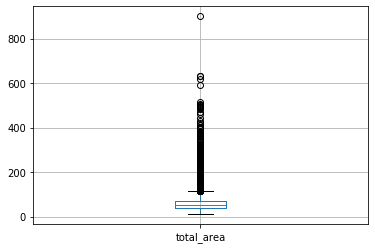

In [91]:
realty_filt.boxplot('total_area')
plt.show()

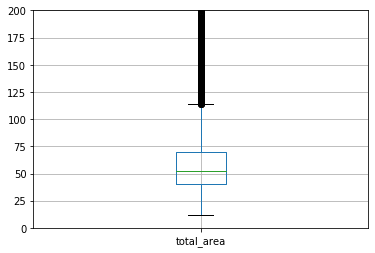

In [92]:
plt.ylim(0, 200)
realty_filt.boxplot('total_area')
plt.show()

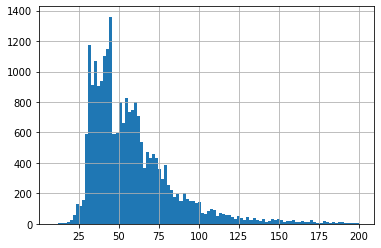

In [93]:
realty_filt['total_area'].hist(bins = 100,range = (10, 200))
plt.show()

Пики в районе 35, 55, 70 метров. Данный метраж характерен для 1,2,3-х комнатных квартир.

In [94]:
# Убедимся в этом сгруппировав по колличеству комнат
realty_filt.groupby('rooms')['total_area'].agg(['count','median','mean'])

,count,median,mean
rooms,,,
0,197,26.05,29.28
1,8036,36.53,37.63
2,7924,53.00,55.84
3,5797,72.90,77.75
4,1175,99.50,107.68
5,326,146.45,161.47
6,105,184.30,201.54
7,59,214.00,265.33
8,12,235.70,259.23


Обращаем внимание, что есть квартиры с 0 комнат, судя по метражу это студии - проверим это далее.  

При работе со столбцом по жилой площади мы уже обращали внимание, что в датасете присутствует "элитное жильё".  
В рамках исследования нас просят убрать редкие и выбивающиеся значения - элитное жильё как раз таким и является.  
Данный сегмент целесообразно исследовать отдельно. В рамках нашего исследования берём только массовый сегмент, поэтому отсекаем значения по нижнему и верхнему усу от **15 до 120м**.

In [95]:
# Элитных квартир и выбросов "коморок" около 5% от датасета
realty_filt.query('total_area <= 15 or total_area >= 120')['total_area'].count()

1103

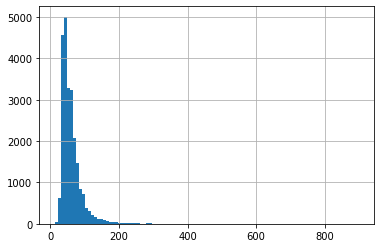

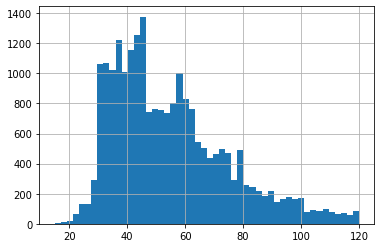

In [96]:
# Грязные данные
realty_filt['total_area'].hist(bins = 100)
plt.show()
# Данные без выбросов
realty_filt.query('total_area >= 15 and total_area <= 120')['total_area'].hist(bins = 50)
plt.show()

In [97]:
total_area_filt = 'total_area >= 15 and total_area <= 120'

### 2) Цена

Перед дальнейшим исследованием опять вернёмся к нашему элитному жилью.  
Очевидно, что основными критериями в датасете являются цена и площадь квартиры.  
Поскольку мы приняли решение отсечь элитный сегмент, целесообразно его сразу отфильтровать, чтобы выделить аномалии и проводить исследования только интересующего нас массового сегмента квартир.

In [98]:
# Отфильтруем элитный сегмент
realty_filt = realty_filt.query('total_area >= 15 and total_area <= 120')

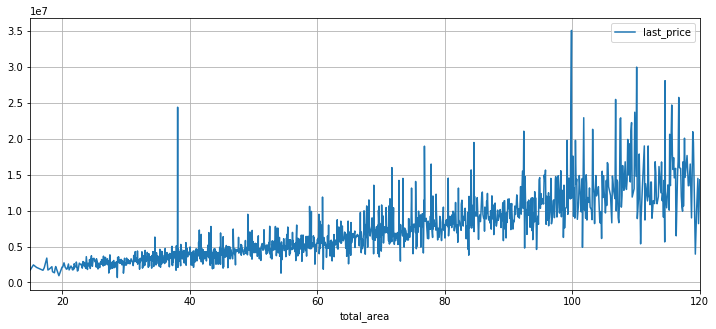

In [99]:
# Убедимся, что есть зависимость между ценой и квадратурой
realty_filt.pivot_table(index='total_area', values='last_price').plot(grid=True, figsize=(12, 5))
plt.show()

In [100]:
print(realty_filt['last_price'].corr(realty_filt['total_area']))

0.6923050858731217


In [101]:
# Средняя цена в районе 5.4 млн рублей выглядит логично
realty_filt['last_price'].describe()

count       22,585.00
mean     5,383,342.72
std      3,544,185.04
min         12,190.00
25%      3,390,000.00
50%      4,500,000.00
75%      6,350,000.00
max     82,000,000.00
Name: last_price, dtype: float64

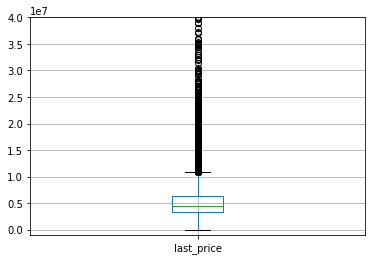

In [102]:
plt.ylim(-1e+06, 40e+6)
realty_filt.boxplot('last_price')
plt.show()

In [103]:
q1 = realty_filt['last_price'].quantile(0.25)                
q3 = realty_filt['last_price'].quantile(0.75)
iqr = q3 - q1
us = q3+1.5*iqr
us

10790000.0

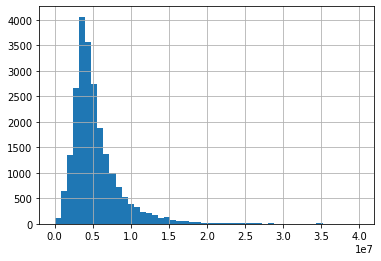

In [104]:
realty_filt['last_price'].hist(bins = 50,range = (0, 40000000))
plt.show()

Мы уже отрезали элитные квартиры, отсекать по верхнему усу на уровне 11млн будет некорректно.  
Посмотрим на дорогие квартиры.

In [105]:
# Сделаем фильтр, для основных параметров
sh_f = ['locality_name', 'last_price', 'total_area','price_square_meter','rooms','cityCenters_nearest']

In [106]:
# Квартира в центре с очень крутым ремонтом могут стоит данные суммы, но всёже это редкость.
realty_filt.query('last_price >= 3.5e+7').sort_values('last_price', ascending = False)[sh_f]

,locality_name,last_price,total_area,price_square_meter,rooms,cityCenters_nearest
6462,Санкт-Петербург,"82,000,000.00",114.00,"719,298.25",3,"3,400.00"
10011,Санкт-Петербург,"53,000,000.00",90.00,"588,888.89",3,"2,385.00"
7726,Санкт-Петербург,"50,000,000.00",93.00,"537,634.41",2,318.00
10001,Санкт-Петербург,"49,500,000.00",119.00,"415,966.39",3,"5,332.00"
7136,Санкт-Петербург,"48,000,000.00",108.00,"444,444.44",3,"3,180.00"
11492,Санкт-Петербург,"46,424,072.00",92.40,"502,425.02",2,318.00
5297,Санкт-Петербург,"45,000,000.00",96.00,"468,750.00",2,318.00
6127,Санкт-Петербург,"40,000,000.00",65.30,"612,557.43",2,"2,380.00"
7596,Санкт-Петербург,"40,000,000.00",110.00,"363,636.36",3,"2,383.00"
12916,Санкт-Петербург,"39,990,000.00",67.70,"590,694.24",3,"2,136.00"


In [107]:
# Есть 1 явно некорректное значение. Стоимость около 400 000 рублей для деревни реальна.
realty_filt.query('last_price <= 5e+5').sort_values('last_price')[sh_f]

,locality_name,last_price,total_area,price_square_meter,rooms,cityCenters_nearest
8793,Санкт-Петербург,"12,190.00",109.00,111.83,2,"9,176.00"
14911,поселок станции Свирь,"430,000.00",54.00,"7,962.96",2,-1.00
17456,Сланцы,"430,000.00",30.40,"14,144.74",1,-1.00
16274,деревня Старополье,"440,000.00",40.00,"11,000.00",1,-1.00
5698,городской поселок Будогощь,"450,000.00",42.00,"10,714.29",2,-1.00
9581,деревня Старополье,"450,000.00",43.40,"10,368.66",2,-1.00
17676,деревня Ям-Тесово,"450,000.00",36.50,"12,328.77",1,-1.00
16219,деревня Вахнова Кара,"450,000.00",38.50,"11,688.31",2,-1.00
23484,Сланцы,"470,000.00",44.50,"10,561.80",2,-1.00
18867,деревня Выскатка,"470,000.00",41.00,"11,463.41",1,-1.00


In [108]:
last_price_filt = 'last_price >= 4.3e+5 and last_price <= 3.5e+7'

In [109]:
# Уберём редкие значения и 1 некорректное на уровне last_price >= 4.3e+5 and last_price < 3.5e+7
realty_filt = realty_filt.query('last_price >= 4.3e+5 and last_price <= 3.5e+7')

В рамках рассмотрение цены, есть смысл сразу обработать аномалии в связанном показателе цены за квадратный метр.

In [110]:
realty_filt['price_square_meter'].describe()

count    22,562.00
mean     95,926.90
std      36,385.73
min       7,962.96
25%      75,862.07
50%      94,239.81
75%     112,573.99
max     848,484.85
Name: price_square_meter, dtype: float64

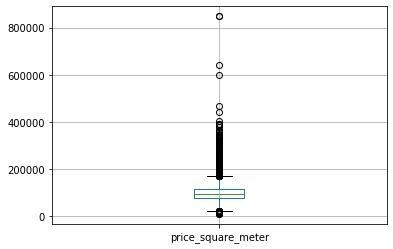

In [111]:
realty_filt.boxplot('price_square_meter')
plt.show()

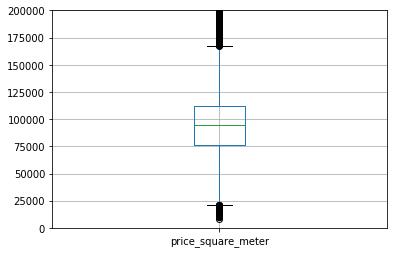

In [112]:
plt.ylim(0, 0.2e+6)
realty_filt.boxplot('price_square_meter')
plt.show()

In [113]:
# Первые 3 значения похожы на выбросы или опять элитное. Уберём эти значения
realty_filt.query('price_square_meter > 400000').sort_values('price_square_meter', ascending = False)[sh_f]

,locality_name,last_price,total_area,price_square_meter,rooms,cityCenters_nearest
4859,Санкт-Петербург,"28,000,000.00",33.00,"848,484.85",1,"1,376.00"
17172,Санкт-Петербург,"28,000,000.00",33.00,"848,484.85",1,"1,462.00"
21238,Всеволожск,"24,412,900.00",38.12,"640,422.35",1,-1.00
22869,Санкт-Петербург,"15,000,000.00",25.00,"600,000.00",1,"8,283.00"
16732,Санкт-Петербург,"35,000,000.00",74.80,"467,914.44",2,"6,655.00"
10377,Санкт-Петербург,"33,000,000.00",75.00,"440,000.00",2,318.00
10654,Санкт-Петербург,"29,900,000.00",74.40,"401,881.72",2,639.00


In [114]:
# Для посёлка цена реальна
realty_filt.query('price_square_meter <= 10000').sort_values('price_square_meter', ascending = False)[sh_f]

,locality_name,last_price,total_area,price_square_meter,rooms,cityCenters_nearest
4405,Сланцы,"500,000.00",52.00,"9,615.38",2,-1.00
14911,поселок станции Свирь,"430,000.00",54.00,"7,962.96",2,-1.00


In [115]:
# Убираем редкие значения
realty_filt = realty_filt.query('price_square_meter <= 400000')

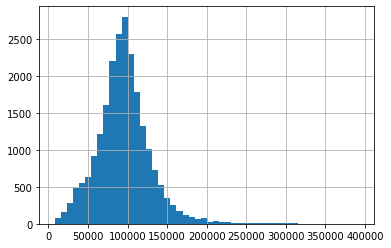

In [116]:
realty_filt['price_square_meter'].hist(bins = 50)
plt.show()

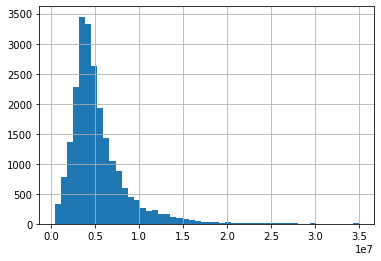

In [117]:
realty_filt['last_price'].hist(bins = 50)
plt.show()

Графики похожы, что логично, ведь цена сильно коррелирует с площадью квартиры.

###  3) Число комнат

In [118]:
realty_filt['rooms'].describe()

count   22,555.00
mean         1.96
std          0.91
min          0.00
25%          1.00
50%          2.00
75%          3.00
max          7.00
Name: rooms, dtype: float64

In [119]:
realty_filt['rooms'].value_counts()

1    8019
2    7887
3    5505
4     844
0     196
5      92
6      11
7       1
Name: rooms, dtype: int64

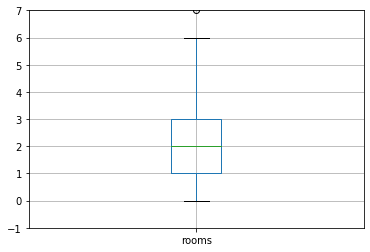

In [120]:
plt.ylim(-1, 7)
realty_filt.boxplot('rooms')
plt.show()

In [121]:
# Проверим гипотезу о том, что 0 значения это студии. 70% - показатель это подтвержает.
realty_filt.query('rooms == 0').groupby('rooms')['studio'].mean()

rooms
0   0.70
Name: studio, dtype: float64

In [122]:
# Уберём редкие 6-7 комнатные квартиры
realty_filt = realty_filt.query('rooms <= 5')

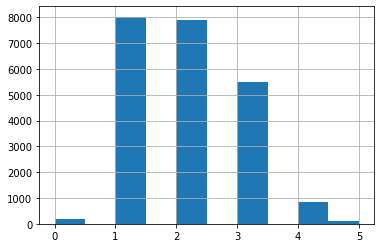

In [123]:
realty_filt['rooms'].hist()
plt.show()

Больше всего 1,2,3 комнатных квартил - логично.

### 4) Высота потолков

На этапе предобработки данных мы уже рассмотрели данных показатель.

In [124]:
realty_filt['ceiling_height'].describe()

count   22,543.00
mean         2.71
std          0.77
min          1.00
25%          2.60
50%          2.70
75%          2.70
max         32.00
Name: ceiling_height, dtype: float64

In [125]:
# Применим фильтр
ceiling_height_filt = '2.4<= ceiling_height <= 4'
realty_filt = realty_filt.query(ceiling_height_filt)

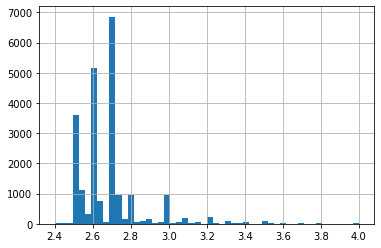

In [126]:
realty_filt['ceiling_height'].hist(bins = 50)
plt.show()

Большая часть в промежутке от 2.5 до 2.75м, что соответствует действительности.

In [127]:
len(realty_filt)

22467

In [128]:
realty_filt.describe()

,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,cityCenters_nearest,days_exposition,price_square_meter,day_exposition,month_exposition,year_exposition,living_total_area_ratio,kitchen_total_area_ratio
count,"22,467.00","22,467.00","22,467.00","22,467.00","22,467.00","22,467.00","22,467.00","22,467.00","22,467.00","22,467.00","22,467.00","22,467.00","22,467.00","22,467.00","22,467.00","22,467.00"
mean,"5,335,581.39",54.77,1.96,2.68,10.80,31.19,5.92,9.88,"11,683.90",153.12,"95,771.34",2.57,6.40,"2,017.38",0.57,0.19
std,"3,302,926.17",19.99,0.91,0.18,6.62,13.25,4.91,4.26,"9,690.45",208.54,"35,089.58",1.79,3.49,1.03,0.12,0.07
min,"430,000.00",15.00,0.00,2.40,1.00,2.00,1.00,1.30,-1.00,-1.00,"7,962.96",0.00,1.00,"2,014.00",0.04,0.04
25%,"3,390,000.00",39.50,1.00,2.60,5.00,19.00,2.00,7.10,"3,872.50",23.00,"75,921.83",1.00,3.00,"2,017.00",0.49,0.14
50%,"4,500,000.00",50.40,2.00,2.70,9.00,30.00,4.00,9.10,"11,968.00",72.00,"94,230.77",3.00,6.00,"2,017.00",0.57,0.18
75%,"6,307,525.00",66.00,3.00,2.70,16.00,39.30,8.00,11.00,"15,864.50",193.00,"112,500.00",4.00,10.00,"2,018.00",0.64,0.24
max,"35,000,000.00",120.00,5.00,4.00,60.00,100.00,33.00,64.00,"65,968.00","1,580.00","392,354.12",6.00,12.00,"2,019.00",2.00,0.79


In [129]:
# Остались значения аномальных этажей. Исходя из данных в интернете самый высокий ЖК в СПБ 35 этажей
realty_filt.query('floors_total > 35')

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,kitchen_area,locality_name,cityCenters_nearest,days_exposition,price_square_meter,day_exposition,month_exposition,year_exposition,floor_cat,living_total_area_ratio,kitchen_total_area_ratio
397,"5,990,000.00",54.00,2018-03-22,2,2.70,36,21.40,28,False,18.70,Санкт-Петербург,"20,444.00",11,"110,925.93",3,3,2018,Другой,0.40,0.35
2253,"3,800,000.00",45.50,2018-06-28,2,2.88,60,27.40,4,False,7.40,Кронштадт,"49,488.00",166,"83,516.48",3,6,2018,Другой,0.60,0.16
11079,"9,200,000.00",75.00,2019-02-22,2,2.70,36,40.00,29,False,12.00,Санкт-Петербург,"20,444.00",-1,"122,666.67",4,2,2019,Другой,0.53,0.16
16731,"3,978,000.00",40.00,2018-09-24,1,2.65,52,10.50,18,False,14.00,Санкт-Петербург,"12,978.00",45,"99,450.00",0,9,2018,Другой,0.26,0.35


In [130]:
# Уберём аномалии
floors_total_filt = 'floors_total <= 35'
realty_filt = realty_filt.query(floors_total_filt)

**В качестве результата выведем ещё раз графики по отфильтрованным данным**

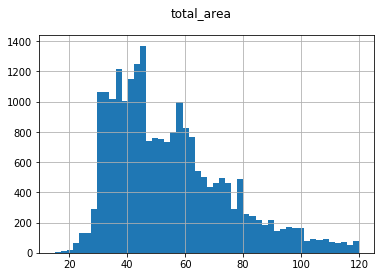

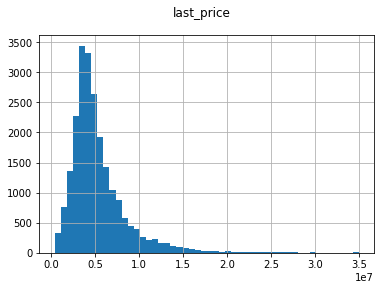

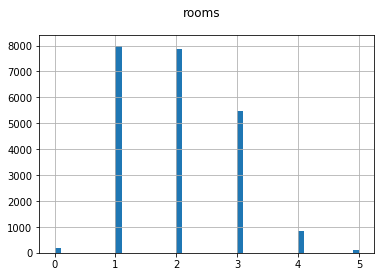

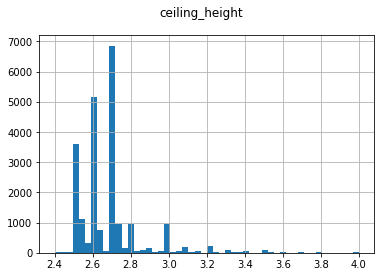

In [131]:
for column in ['total_area','last_price', 'rooms', 'ceiling_height']:
    realty_filt[column].hist(bins = 50)
    plt.suptitle(column)
    plt.show()

#####  Вывод
- Общая площадь. Пики в районе 35, 55, 70 метров. Данный метраж характерен для 1,2,3-х комнатных квартир.  
- Цена. Пик около 4.5 млн рублей - это средняя цена для 1-2 комнатных квартир, которых больше всего в датасете.
- Колличество комнат. Больше всего 1,2,3 - комнатных квартир.
- Высота потолков. Пики от 2.5 до 2.7метров - это стандартная высота потолков.

### Изучим время продажи квартиры

In [132]:
# Отфильтруем незаполненные поля-"маркеры"
realty_filt_demark = realty_filt.query(days_exposition_mark)

In [133]:
realty_filt_demark['days_exposition'].describe()

count   19,589.00
mean       175.75
std        214.19
min          1.00
25%         44.00
50%         93.00
75%        223.00
max      1,580.00
Name: days_exposition, dtype: float64

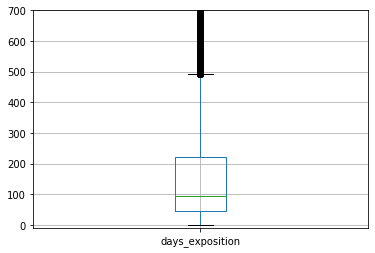

In [134]:
plt.ylim(-10, 700)
realty_filt_demark.boxplot(column='days_exposition')
plt.show()

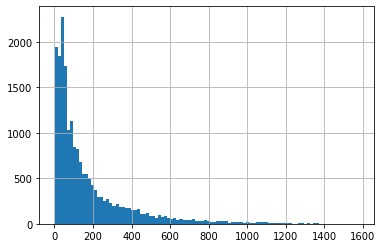

In [135]:
realty_filt_demark['days_exposition'].hist(bins = 100)
plt.show()

In [136]:
realty_filt_demark.query('days_exposition <= 10')

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,kitchen_area,locality_name,cityCenters_nearest,days_exposition,price_square_meter,day_exposition,month_exposition,year_exposition,floor_cat,living_total_area_ratio,kitchen_total_area_ratio
11,"3,300,000.00",44.00,2018-08-27,2,2.60,5,31.00,4,False,6.00,Ломоносов,"51,677.00",7,"75,000.00",0,8,2018,Другой,0.70,0.14
53,"4,300,000.00",39.10,2017-11-10,1,2.60,25,15.40,13,False,15.50,поселок Парголово,"18,783.00",6,"109,974.42",4,11,2017,Другой,0.39,0.40
62,"4,800,000.00",78.60,2017-09-17,3,2.80,9,48.80,5,False,11.90,Сертолово,-1.00,5,"61,068.70",6,9,2017,Другой,0.62,0.15
94,"3,500,000.00",29.50,2019-04-26,1,2.50,5,15.60,2,False,5.50,Санкт-Петербург,"7,303.00",4,"118,644.07",4,4,2019,Другой,0.53,0.19
100,"3,800,000.00",38.60,2018-02-22,1,2.70,9,18.00,6,False,8.40,Санкт-Петербург,"13,364.00",8,"98,445.60",3,2,2018,Другой,0.47,0.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23596,"3,500,000.00",43.50,2017-12-05,2,2.50,9,27.00,6,False,6.20,Санкт-Петербург,"16,671.00",6,"80,459.77",1,12,2017,Другой,0.62,0.14
23606,"2,850,000.00",68.00,2018-07-29,1,3.00,5,41.00,3,False,10.00,Санкт-Петербург,"7,740.00",4,"41,911.76",6,7,2018,Другой,0.60,0.15
23641,"3,100,000.00",30.00,2018-03-28,1,2.50,5,17.00,5,False,5.00,Колпино,"29,843.00",10,"103,333.33",2,3,2018,Последний,0.57,0.17
23647,"5,700,000.00",45.60,2019-01-09,1,2.75,16,18.70,6,False,17.60,Санкт-Петербург,"12,551.00",8,"125,000.00",2,1,2019,Другой,0.41,0.39


#####  Вывод
В нашем датасете нет информации о том, была продана квартира или собственник снял объявление по другой причине.  
Скорее всего, если объявления снято в течение 10 дней, значит собственник отказался от продажи, например, было мало звонков.  

В целом мы видем:
-  Обычно продажа занимает около 95 дней
-  Быстрая продажа: 45 дней
-  Долгая продажа: Свыше 220 дней.

Всё, что висит больше 1 года вероятно "мертвые" объявления. Собственник может просто забыть его снять.  
Если на сайте нет автоматического снятия, может получится такая картина.

###  Уберите редкие и выбивающиеся значения
Аномальные и редкие значения были обработаны на этапе предобработки данных.  
Была отсеяна категория элитного жилья.  
Выявлены аномальные значения в цене, площади, высоте потолков, этажах и цене за квадратный метр.  
Много пропусков в автоматически расчитанных значениях.  

In [137]:
realty_filt.shape

(22463, 20)

В результате было отсеяно **1236** значений, что составляет примерно **5%** датасета.

###  Какие факторы больше всего влияют на стоимость квартиры? Изучим, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучим зависимость от даты размещения: дня недели, месяца и года.

**Цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра**

In [138]:
# Выделим интересующие нас столбцы
price_corr = realty_filt[['last_price','total_area','price_square_meter', 'rooms', 'floor_cat', 'cityCenters_nearest']]
price_corr = price_corr.query(cityCenters_nearest_mark)
price_corr.head()

,last_price,total_area,price_square_meter,rooms,floor_cat,cityCenters_nearest
0,"13,000,000.00",108.00,"120,370.37",3,Другой,"16,028.00"
1,"3,350,000.00",40.40,"82,920.79",1,Первый,"18,603.00"
2,"5,196,000.00",56.00,"92,785.71",2,Другой,"13,933.00"
4,"10,000,000.00",100.00,"100,000.00",2,Другой,"8,098.00"
6,"3,700,000.00",37.30,"99,195.71",1,Другой,"19,143.00"


In [139]:
import seaborn as sns

#Seaborn - модуль для визуализации статистических результатов.
#В данном случае нас интересует его поддержка цветовых палитр

cmap=sns.diverging_palette(240, 10, as_cmap=True)

price_corr.corr().style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '100px', 'font-size': '12pt'})\
    .set_precision(2)

,last_price,total_area,price_square_meter,rooms,cityCenters_nearest
last_price,1,0.76,0.69,0.46,-0.35
total_area,0.76,1,0.11,0.79,-0.2
price_square_meter,0.69,0.11,1,-0.14,-0.41
rooms,0.46,0.79,-0.14,1,-0.12
cityCenters_nearest,-0.35,-0.2,-0.41,-0.12,1


Высокий коеффициент корреляции стоимости с площадью и ценой квадратного метра.  
Средние коэффциенты с колличеством комнат и расстоянием до центра.  

Всё логично - чем больше цена, тем больше метраж и комнат + меньше расстояние до центра.

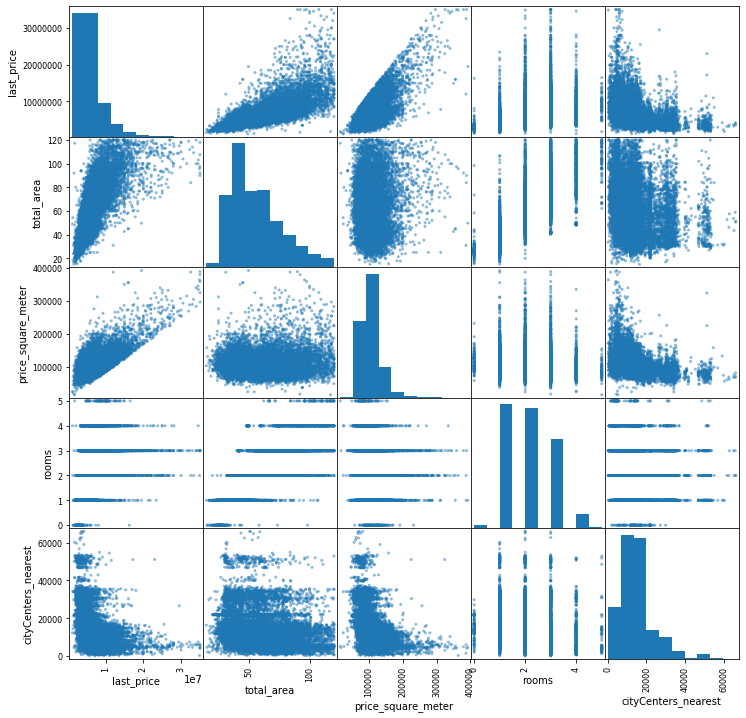

In [140]:
# Посмотрим повнимательнее
pd.plotting.scatter_matrix(price_corr, figsize=(12, 12))
plt.show()

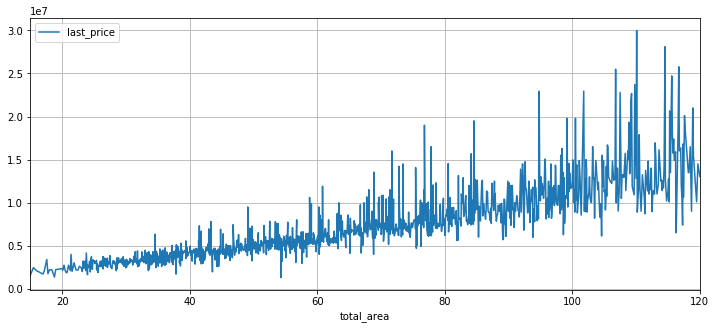

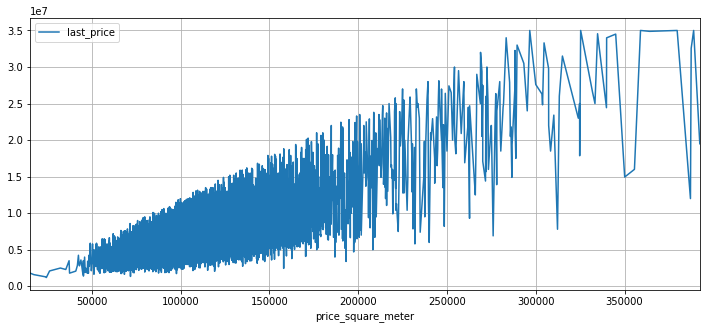

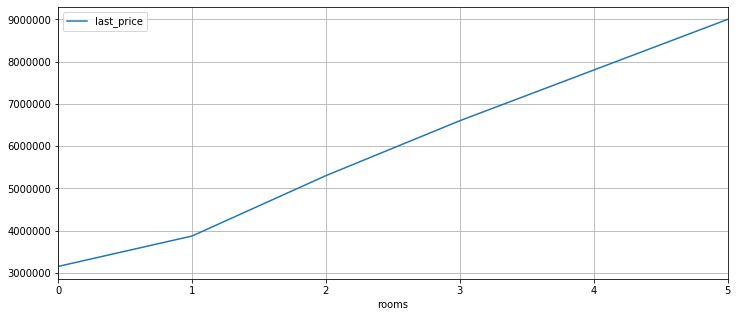

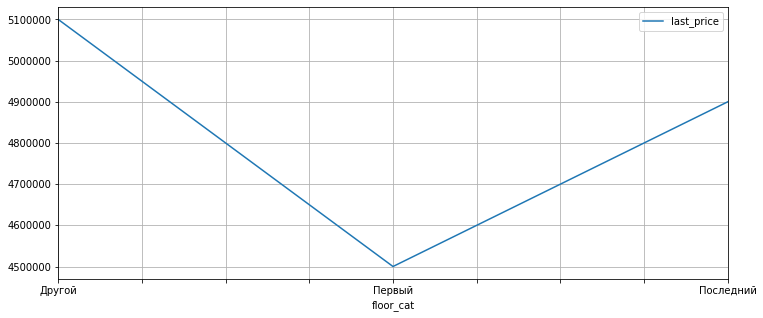

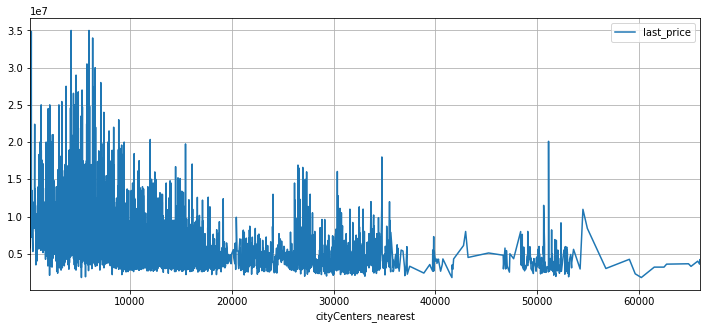

In [141]:
for column in ['total_area','price_square_meter', 'rooms', 'floor_cat', 'cityCenters_nearest']:
    price_corr.pivot_table(index=column, values='last_price',aggfunc = 'median').plot(grid=True, figsize=(12, 5))

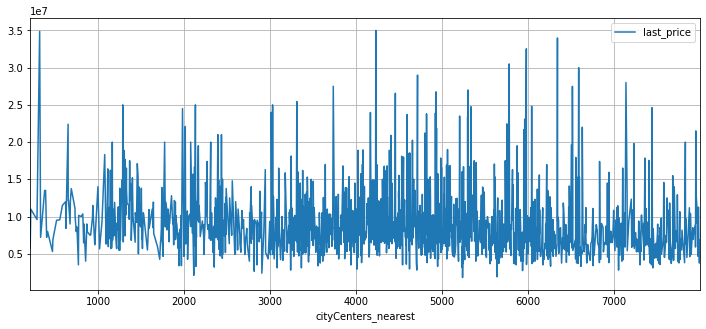

In [142]:
price_corr.query('cityCenters_nearest < 8000').pivot_table(index='cityCenters_nearest', values='last_price').plot(grid=True, figsize=(12, 5))
plt.show()

Очевидно, что чем больше у тебя бюджет, тем более разнообразные варианты параметров доступны.  
В среднем есть прямая зависимость между площадью, колличеством комнат и стоимостью.  
Первый и последний этаж стоят дешевле остальных.  
С расстояниям до центра всё менее очевидно, но при бюджете меньше 5 млн рублей найти квартиру ближе 8км к центру будет сложно. 

**Зависимость от даты размещения: дня недели, месяца и года**

In [143]:
price_ymd = realty_filt[['last_price','year_exposition','month_exposition','day_exposition']]
price_ymd

,last_price,year_exposition,month_exposition,day_exposition
0,"13,000,000.00",2019,3,3
1,"3,350,000.00",2018,12,1
2,"5,196,000.00",2015,8,3
4,"10,000,000.00",2018,6,1
5,"2,890,000.00",2018,9,0
...,...,...,...,...
23693,"4,600,000.00",2016,8,4
23695,"3,100,000.00",2018,1,0
23696,"2,500,000.00",2018,2,6
23697,"11,475,000.00",2017,3,1


In [144]:
price_ymd.corr().style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '100px', 'font-size': '12pt'})\
    .set_precision(2)

,last_price,year_exposition,month_exposition,day_exposition
last_price,1,-0.016,-0.00087,-0.015
year_exposition,-0.016,1,-0.27,-0.0038
month_exposition,-0.00087,-0.27,1,0.012
day_exposition,-0.015,-0.0038,0.012,1


Корреляции почти нет

In [145]:
for column in ['year_exposition','month_exposition','day_exposition']:
    print(price_ymd.pivot_table(index=column, values='last_price',aggfunc = 'median'))

                  last_price
year_exposition             
2014            6,200,000.00
2015            5,000,000.00
2016            4,390,000.00
2017            4,390,000.00
2018            4,500,000.00
2019            4,950,000.00
                   last_price
month_exposition             
1                4,500,000.00
2                4,500,000.00
3                4,532,500.00
4                4,700,000.00
5                4,430,000.00
6                4,300,000.00
7                4,500,000.00
8                4,500,000.00
9                4,550,000.00
10               4,500,000.00
11               4,550,000.00
12               4,550,000.00
                 last_price
day_exposition             
0              4,500,000.00
1              4,600,000.00
2              4,550,000.00
3              4,500,000.00
4              4,500,000.00
5              4,500,000.00
6              4,499,500.00


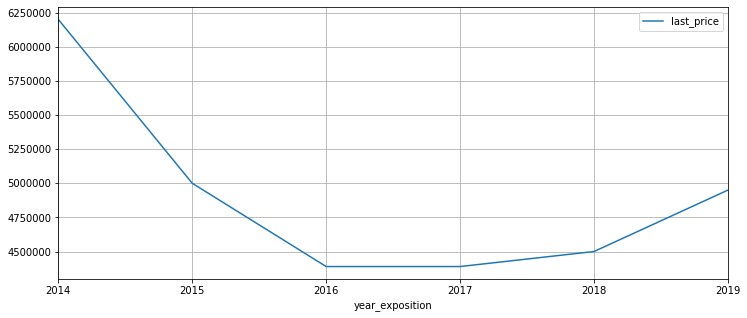

In [146]:
price_ymd.pivot_table(index='year_exposition', values='last_price',aggfunc = 'median').plot(grid=True, figsize=(12, 5))
plt.show()

In [147]:
# Обратим внимание, что для 2014 и 2019 года данные неполные
realty_filt.pivot_table(index='year_exposition', values='last_price',columns = 'month_exposition',aggfunc = 'median')

month_exposition,1,2,3,4,5,6,7,8,9,10,11,12
year_exposition,,,,,,,,,,,,
2014,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,"11,995,000.00","6,020,625.00"
2015,"5,450,000.00","5,275,000.00","5,513,137.50","5,100,000.00","4,975,000.00","4,594,500.00","4,865,000.00","5,325,500.00","5,999,000.00","4,985,000.00","5,000,000.00","4,550,000.00"
2016,"4,600,000.00","4,470,000.00","4,350,000.00","4,450,000.00","4,200,000.00","4,390,000.00","4,220,000.00","4,024,500.00","4,529,318.50","4,800,000.00","4,350,000.00","4,600,000.00"
2017,"4,500,000.00","4,500,000.00","4,422,789.00","4,500,000.00","4,500,000.00","4,150,000.00","4,300,000.00","4,400,000.00","4,500,000.00","4,200,000.00","4,400,000.00","4,300,000.00"
2018,"4,260,000.00","4,300,000.00","4,200,000.00","4,450,000.00","4,500,000.00","4,300,000.00","4,600,000.00","4,550,000.00","4,500,000.00","4,600,000.00","4,700,000.00","5,000,000.00"
2019,"4,900,000.00","5,100,000.00","4,900,000.00","4,950,000.00","4,950,000.00",nan,nan,nan,nan,nan,nan,nan


(4000000.0, 5500000.0)

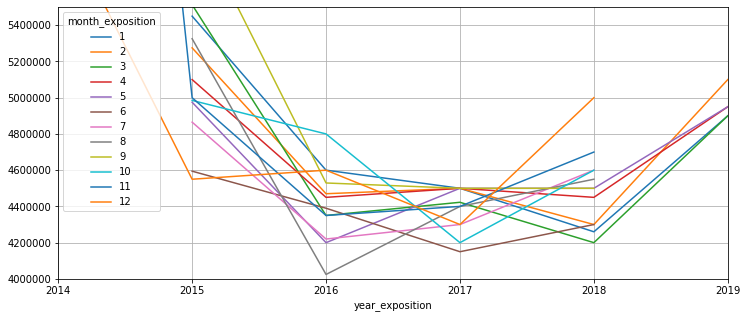

In [148]:
realty_filt.pivot_table(index='year_exposition', values='last_price',columns = 'month_exposition',aggfunc = 'median').plot(grid=True, figsize=(12, 5))
plt.ylim(0.4e+7, 0.55e+7)

С 2014 по 2016 года было падение цен на недвижимости связанные с экономическим кризисом.
Начиная с 2018 рост цен.  
День и месяц размещения объявления на стоимость не влияют.

### Выберем 10 населённых пунктов с наибольшим числом объявлений. Посчитаемсреднюю цену квадратного метра в этих населённых пунктах. Выделим населённые пункты с самой высокой и низкой стоимостью жилья. 

In [149]:
# Выделяем топ 10
top_localities = realty_filt['locality_name'].value_counts().head(10)
top_localities

Санкт-Петербург      14644
поселок Мурино         554
поселок Шушары         439
Всеволожск             392
Пушкин                 348
Колпино                336
поселок Парголово      326
Гатчина                303
деревня Кудрово        299
Выборг                 229
Name: locality_name, dtype: int64

In [150]:
# Берём список для фильтрации
top_locality_names = list(top_localities.index)
top_locality_names

['Санкт-Петербург',
 'поселок Мурино',
 'поселок Шушары',
 'Всеволожск',
 'Пушкин',
 'Колпино',
 'поселок Парголово',
 'Гатчина',
 'деревня Кудрово',
 'Выборг']

In [151]:
(
    realty_filt.query('locality_name in @top_locality_names')
    .pivot_table(index='locality_name', values='price_square_meter')
    .sort_values(by='price_square_meter', ascending=False)
)

,price_square_meter
locality_name,
Санкт-Петербург,"110,232.07"
Пушкин,"102,342.29"
деревня Кудрово,"92,473.55"
поселок Парголово,"90,332.26"
поселок Мурино,"85,656.21"
поселок Шушары,"78,666.17"
Колпино,"75,370.03"
Гатчина,"68,931.69"
Всеволожск,"67,231.27"


**Вывод**
В Санкт-Петербурге самая высокая цена за квадратный метр - логично это северная столица.  
Выборг замыкает 10-ку.

In [152]:
# Дополнительно посмотрим на другие средние параметры в этих населенных пунктах
realty_filt.query('locality_name in @top_locality_names').pivot_table(index='locality_name', values=['total_area','last_price','rooms','ceiling_height']).sort_values(by = 'last_price', ascending = False).head(10)

,ceiling_height,last_price,rooms,total_area
locality_name,,,,
Санкт-Петербург,2.72,"6,356,214.21",2.02,57.06
Пушкин,2.65,"5,682,111.97",1.90,54.90
поселок Парголово,2.61,"4,477,608.77",1.59,51.06
деревня Кудрово,2.65,"4,234,157.93",1.44,46.57
поселок Шушары,2.62,"4,093,066.06",1.80,53.65
Колпино,2.61,"3,853,985.85",2.10,52.14
Всеволожск,2.65,"3,703,918.53",1.91,55.53
поселок Мурино,2.64,"3,653,272.44",1.39,43.97
Гатчина,2.62,"3,449,968.18",1.90,50.02


In [153]:
# Также на населенные пункты с самой высоким показателем средней стоимости
realty_filt.pivot_table(index='locality_name', values=['total_area','last_price','rooms','ceiling_height']).sort_values(by = 'last_price', ascending = False).head(10)

,ceiling_height,last_price,rooms,total_area
locality_name,,,,
Санкт-Петербург,2.72,"6,356,214.21",2.02,57.06
Зеленогорск,2.63,"6,144,352.17",1.74,49.03
Сестрорецк,2.68,"6,012,989.25",1.97,58.77
Пушкин,2.65,"5,682,111.97",1.90,54.90
поселок Репино,2.52,"4,800,000.00",3.00,55.50
деревня Заневка,2.70,"4,781,500.00",1.83,60.95
деревня Мистолово,2.64,"4,770,113.64",1.73,48.08
деревня Глинка,3.10,"4,750,000.00",2.50,91.50
коттеджный поселок Счастье,3.00,"4,650,000.00",1.00,72.00


В среднем в СПБ самая высокая цена и хорошие параметры квартиры.  
Однако можно купить дом в коттеджном посёлке с 3 метровыми потолками и большим метражом за меньшие деньги.

### Анализ квартир в Санк-Петербурге

In [154]:
# Выделим квартиры в СПБ
spb = pd.DataFrame(realty_filt.loc[realty_filt['locality_name'] == "Санкт-Петербург"])
len(spb)

14644

In [155]:
# В СПБ все строки с информацией по расстоянию до центра заполнены
spb.query('cityCenters_nearest ==-1')

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,kitchen_area,locality_name,cityCenters_nearest,days_exposition,price_square_meter,day_exposition,month_exposition,year_exposition,floor_cat,living_total_area_ratio,kitchen_total_area_ratio


In [156]:
# Создадим столбец с расстоянием до центра в километрах округляя до целых значений
km = 1000
spb['cityCenters_nearest_km'] = (spb['cityCenters_nearest'] / km).astype('int')

In [157]:
# Рассчитаем среднюю цену на каждом киллометре
spb.pivot_table(index='cityCenters_nearest_km', values='last_price')

,last_price
cityCenters_nearest_km,
0,"10,224,453.00"
1,"10,024,267.44"
2,"9,091,152.49"
3,"8,582,078.82"
4,"9,792,570.27"
5,"9,424,827.75"
6,"8,491,997.08"
7,"8,289,810.56"
8,"7,212,894.35"


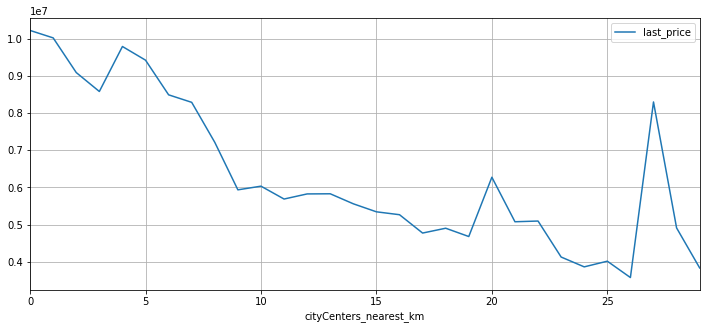

In [158]:
spb.pivot_table(index='cityCenters_nearest_km', values='last_price').plot(grid=True, figsize=(12, 5))
plt.show()

Центральный сегмент квартир начинается на уровне **8км**

### Анализ квартир в центре

**Площадь, цена, число комнат, высота потолков**

In [159]:
# Выделим квартиры центрального сегманта
realty_in_center = pd.DataFrame(spb.query('cityCenters_nearest_km <= 8'))
len(realty_in_center)

3545

In [160]:
# Выделим нужные параметры
realty_in_center_f1 = realty_in_center[['total_area','last_price','rooms','ceiling_height']]

In [161]:
realty_in_center_f1.describe()

,total_area,last_price,rooms,ceiling_height
count,"3,545.00","3,545.00","3,545.00","3,545.00"
mean,68.54,"8,819,885.12",2.33,2.88
std,23.48,"4,657,331.32",0.96,0.28
min,15.50,"1,600,000.00",0.00,2.40
25%,48.70,"5,800,000.00",2.00,2.70
50%,67.00,"7,750,000.00",2.00,2.70
75%,86.00,"10,500,000.00",3.00,3.00
max,120.00,"35,000,000.00",5.00,4.00


In [162]:
realty_in_center_f1.columns

Index(['total_area', 'last_price', 'rooms', 'ceiling_height'], dtype='object')

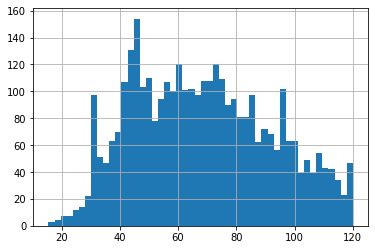

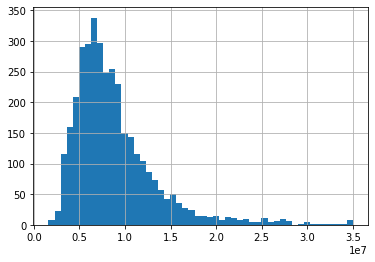

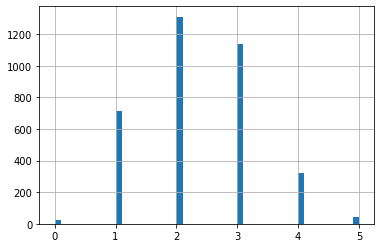

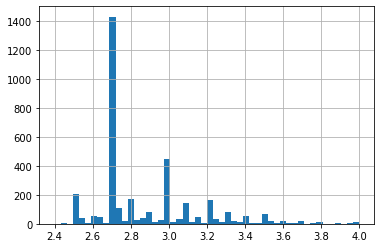

In [163]:
for col in realty_in_center_f1.columns:
    realty_in_center_f1[col].hist(bins = 50)
    plt.show()

In [164]:
# Выведем сравнительную таблицу с результами
All=list(realty_filt[['total_area','last_price','rooms','ceiling_height']].mean())
Center=list(realty_in_center_f1.mean())
Tab = {'Parameters': ['total_area','last_price','rooms','ceiling_height'],
        'All': All,
        'Center': Center
        }

Res = pd.DataFrame(Tab, columns= ['Parameters', 'All','Center'])
Res

,Parameters,All,Center
0,total_area,54.77,68.54
1,last_price,"5,335,509.02","8,819,885.12"
2,rooms,1.96,2.33
3,ceiling_height,2.68,2.88


**Вывод**  
По всем параметрам квартиры в центре более высокого уровня по всем показателям.  
При этом больше 2,3 комнатных квартир.

#### Анализ факторов влияющих на стоимость :число комнат, этаж, удалённость от центра, дата размещения объявления

In [165]:
price_corr_mid = realty_in_center[['last_price','total_area','price_square_meter', 'rooms', 'floor_cat', 'cityCenters_nearest']]
price_corr_mid

,last_price,total_area,price_square_meter,rooms,floor_cat,cityCenters_nearest
4,"10,000,000.00",100.00,"100,000.00",2,Другой,"8,098.00"
24,"6,500,000.00",97.20,"66,872.43",2,Первый,"2,336.00"
61,"7,990,000.00",74.00,"107,972.97",2,Последний,"4,288.00"
63,"20,000,000.00",118.00,"169,491.53",3,Другой,"4,800.00"
70,"3,400,000.00",30.00,"113,333.33",1,Первый,"8,313.00"
...,...,...,...,...,...,...
23664,"9,000,000.00",110.00,"81,818.18",4,Другой,"5,016.00"
23665,"4,250,000.00",47.00,"90,425.53",1,Первый,"4,946.00"
23681,"5,250,000.00",43.00,"122,093.02",2,Другой,"7,262.00"
23690,"5,500,000.00",52.00,"105,769.23",2,Другой,"6,263.00"


In [166]:
price_corr_mid.corr().style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '100px', 'font-size': '12pt'})\
    .set_precision(2)

,last_price,total_area,price_square_meter,rooms,cityCenters_nearest
last_price,1,0.67,0.72,0.35,-0.15
total_area,0.67,1,0.012,0.77,-0.22
price_square_meter,0.72,0.012,1,-0.22,-0.06
rooms,0.35,0.77,-0.22,1,-0.2
cityCenters_nearest,-0.15,-0.22,-0.06,-0.2,1


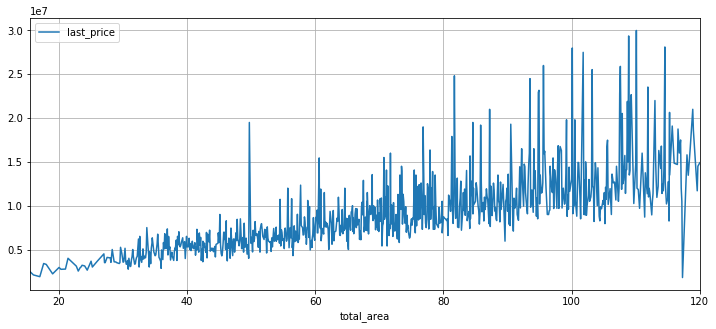

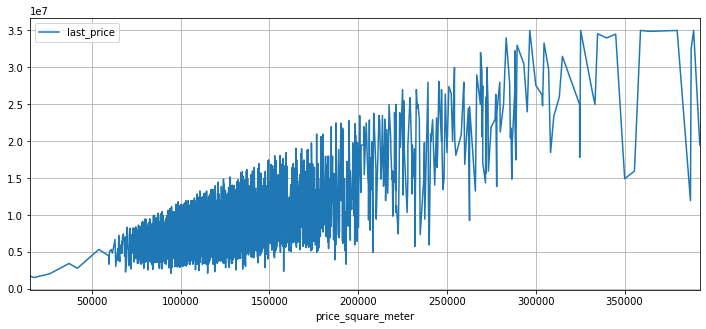

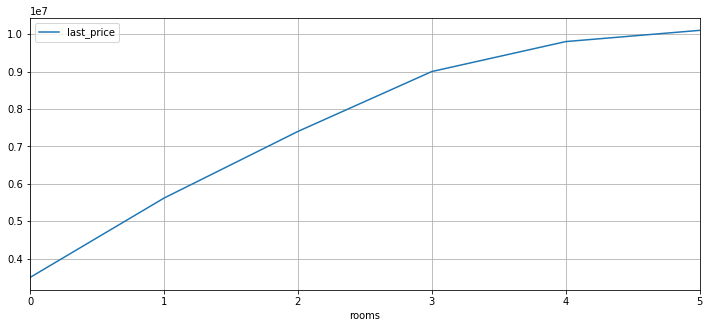

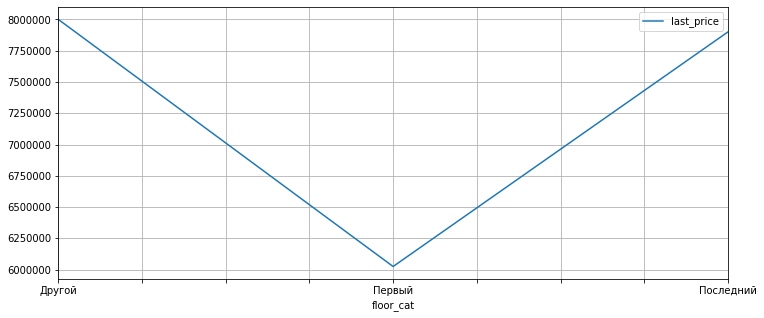

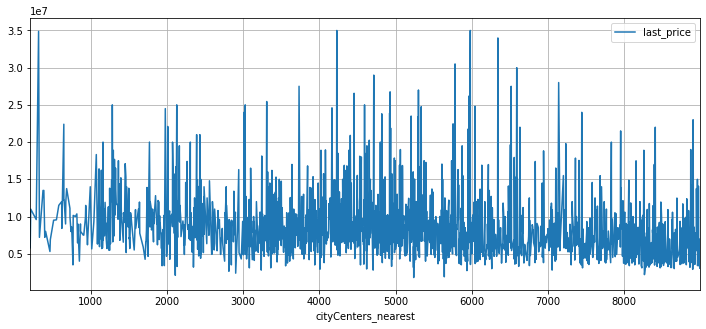

In [167]:
for column in ['total_area','price_square_meter', 'rooms', 'floor_cat', 'cityCenters_nearest']:
    price_corr_mid.pivot_table(index=column, values='last_price',aggfunc = 'median').plot(grid=True, figsize=(12, 5))

In [168]:
# Сравнение по этажам
fcm = price_corr_mid.pivot_table(index='floor_cat', values='last_price').sort_values(by='last_price')
fcm.columns = ['Cent']
fca = realty_filt.pivot_table(index='floor_cat', values='last_price').sort_values(by='last_price')
fca.columns = ['All']
fca.join(fcm)

,All,Cent
floor_cat,,
Первый,"4,313,085.78","6,884,995.01"
Последний,"4,924,404.21","8,623,689.92"
Другой,"5,586,583.96","9,182,860.99"


**Вывод**  
В целом показатели идентичны с общими.  
Можно выделить, что последний этаж также дорогой.  
Колличество комнат меньше влияет на стоимость.

In [169]:
price_ymd_mid = realty_in_center[['last_price','year_exposition','month_exposition','day_exposition']]

In [170]:
price_ymd_mid.corr().style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '100px', 'font-size': '12pt'})\
    .set_precision(2)

,last_price,year_exposition,month_exposition,day_exposition
last_price,1,-0.015,-0.028,-0.026
year_exposition,-0.015,1,-0.25,-0.008
month_exposition,-0.028,-0.25,1,0.045
day_exposition,-0.026,-0.008,0.045,1


In [171]:
for column in ['year_exposition','month_exposition','day_exposition']:
    print(price_ymd_mid.pivot_table(index=column, values='last_price',aggfunc = 'median'))

                  last_price
year_exposition             
2014            9,990,000.00
2015            8,100,000.00
2016            7,825,000.00
2017            7,500,000.00
2018            7,700,000.00
2019            8,000,000.00
                   last_price
month_exposition             
1                7,875,000.00
2                7,900,000.00
3                7,825,000.00
4                7,690,000.00
5                7,400,000.00
6                7,623,500.00
7                8,000,000.00
8                7,720,000.00
9                8,340,000.00
10               7,600,000.00
11               7,950,000.00
12               6,900,000.00
                 last_price
day_exposition             
0              7,925,000.00
1              7,600,000.00
2              7,997,500.00
3              7,600,000.00
4              7,610,000.00
5              7,525,000.00
6              8,200,000.00


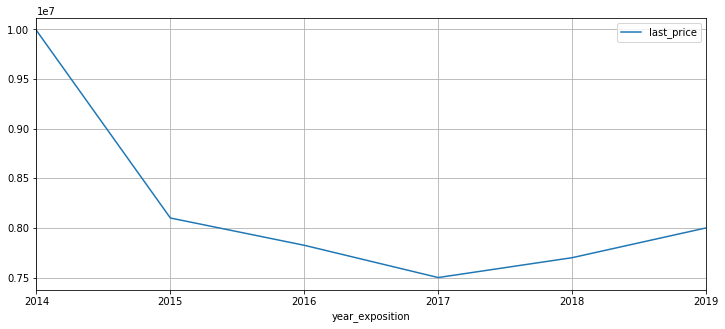

In [172]:
price_ymd_mid.pivot_table(index='year_exposition', values='last_price',aggfunc = 'median').plot(grid=True, figsize=(12, 5))
plt.show()

**Вывод**  
Показатели идентичны общей группе.  
Есть чуть большая корреляция по месяцам, но по средней сумме отличие незначительное.  

### Шаг 5. Общий вывод

- Недвижимость в центре и в Питере в среднем дороже, чем квартиры вне центра и за Питером, но при желании можно купить большой дом в коттеджном посёлке за меньшую стоимость.  
- На стоимость влияет метраж квартиры и колличество комант.    
- Первый и последний этаж стоят дешевле остальных. В центре последний этаж также дорогой.  
- В период экономического кризиса с 2014года снизилась средняя стоимость жилья. С 2018 года наблюдается рост.  
- Центральный сегмент в пределах 8км - жильё более высокого уровня и стоит дороже. Предложений дешевле 5млн руб почти нет.  
- Отдельно нужно отметить, что у нас отсутствуют такие ключевые метрики как: Расстояние до метро, Тип ремонта.    
  Стоимость жилья однозначно зависит от этих параметров.  
- Для выявления мошенников стоит обратить внимание на объявления без фотографий и с низкой стоимостью.

**Рекомендации заказчику**
- Проработать верификацию данных заполняемых пользователем для минимизации пропущенных и некорректных значений. Прежде всего обратить внимание на отсутствие названий населенных пунктов.  
- При введении пользователем явно некорректных значений выводить уточняющий вопрос.  
- Настроить корректное заполнение автоматически подтягиваемых картографических данных.  Много явно технических пропусков, непонятно отсутствие информации по расстоянию при наличии названия населенных пунктов.  
- На основне полученных средних данных/либо если такая база после заполнения пользователем адреса подтягивать типовую серию дома и его параметры - колличество этажей, высота потолков.  
- Добавить данные по: Дата снятия объявления, расстояние до метро, тип ремонта, колличество собственников, ипотека.
- Часть значений могут хранится в целочисленных типах.  
- Есть неточности в описании данных. 
  cityCenters_nearest — расстояние до центра города (м). По факту является расстоянием до центра СПБ.  
- В базе есть объявления с временем размещения больше 1 года. Если они за это время не обновлялись можно отправлять пользователю запрос по email с предожением обновить дату. При отсутствии ответа снимать такие объявления, они явно не актуальны.